<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/syntheticdatageneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:

Home page:
https://docs.sdv.dev/sdv/

GitHub:
https://github.com/sdv-dev/SDV

Data preparation
https://docs.sdv.dev/sdv/single-table-data/data-preparation/single-table-metadata-api

# Synthetic Data Generation
Synthetic Data Generation refers to the process of generating artificial data that imitates real-world data. This data can be used for a variety of purposes, including training machine learning models, testing software systems, and protecting sensitive data.

The process of Synthetic Data Generation typically involves using algorithms to generate data that has similar statistical properties to real-world data. This can be done by analyzing patterns and correlations in the real data and then using this information to generate new data that follows the same patterns and correlations.

Synthetic Data Generation can be particularly useful in situations where real data is limited, expensive, or sensitive. For example, if you are developing a machine learning model that requires a large amount of data, you may not have access to enough real-world data to train the model effectively. In this case, you could use Synthetic Data Generation to generate additional data that can be used to train the model.

Overall, Synthetic Data Generation is a powerful tool for data scientists and software developers, providing a way to generate data that can be used to train models, test systems, and protect sensitive data, all while minimizing the need for real-world data.

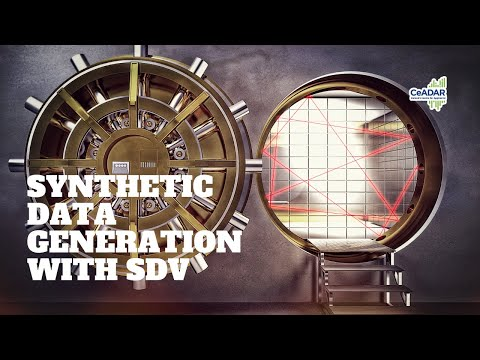

In [ ]:
#@title Synthetic Data Generation with SDV
#@markdown This video gives an intriduction to Synthetic Data Generation with SDV
from IPython.display import YouTubeVideo
YouTubeVideo('VD55NmNuhOw', width=600, height=400)

# Synthetic Data Generation for gas process digital twins
Training Machine Learning Models: Synthetic data can be used to train machine learning models that are used in gas process digital twins. Machine learning models can be trained using synthetic data that mimics the behavior of real-world gas processes. This synthetic data can be generated using algorithms that are based on physical models of gas processes or using statistical models that are trained on real-world data.

Testing and Validation: Synthetic data can also be used to test and validate gas process digital twins. By generating synthetic data that simulates different scenarios, you can test how the digital twin responds to different conditions. This can help identify any weaknesses or areas for improvement in the digital twin.

Privacy and Security: Another benefit of synthetic data is that it can be used to protect sensitive data. For example, if you need to share data with third-party vendors or partners, you can use synthetic data instead of real data to protect the privacy and security of the data.

# The Synthetic Data Vault (SDV) is a Python library
The Synthetic Data Vault (SDV) is a Python library designed to be your one-stop shop for creating tabular synthetic data. The SDV uses a variety of machine learning algorithms to learn patterns from your real data and emulate them in synthetic data.

In [ ]:
%%capture
!pip install sdv
!pip install wget

IMPORTANT! When this is finished, please restart the runtime by clicking on Runtime, and then Restart runtime in the top menu bar.

# Syntetic data generation is done in four steps:

1. Data preparation
2. Model the data
3. Generate new synthetic data
4. Test and check quality

# 1. Data preparation

https://docs.sdv.dev/sdv/single-table-data/data-preparation

Single table data contains rows and columns of information. Each row typically represents a new entity such as a user, transaction, or session.

Before you begin creating synthetic data, it's important to have your data ready in the right format:

Data, loaded into Python as a pandas DataFrame object, and

Metadata, a SingleTableMetadata object that describes your table. It includes the data types in each column, primary keys and other identifiers.

In [90]:
import wget
url = 'https://raw.githubusercontent.com/EvenSol/NeqSim-Colab/master/notebooks/process/TimeSeries.csv'
filename = wget.download(url)

In [91]:
from sdv.datasets.local import load_data_from_csv
try:
  datasets = load_data_from_csv('./TimeSeries.csv')
except:
  print('error loading data')

In [92]:
import pandas as pd
datasets['time'] = pd.to_datetime(datasets['time'])
datasets.info()
datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 295 non-null    int64         
 1   time               295 non-null    datetime64[ns]
 2   AIT-1135xyzPV      295 non-null    float64       
 3   AIT-1134xyzPV      295 non-null    float64       
 4   TIC-1114xyz        295 non-null    float64       
 5   TIC-1114xyz.1      295 non-null    float64       
 6   SI-1313xyz         295 non-null    float64       
 7   SI-1213xyz         295 non-null    float64       
 8   TI-1141xyz         295 non-null    float64       
 9   TI-1121xyz         295 non-null    float64       
 10  PI-1115xyz         295 non-null    float64       
 11  FIT-1121xyzINUSE2  295 non-null    float64       
 12  TIT-1115xyz        295 non-null    float64       
 13  PI-1115xyz.1       295 non-null    float64       
 14  TI-1123xyz

,ID,time,AIT-1135xyzPV,AIT-1134xyzPV,TIC-1114xyz,TIC-1114xyz.1,SI-1313xyz,SI-1213xyz,TI-1141xyz,TI-1121xyz,...,TI-1114xyz,TI-1119xyz,PDI-1117xyz.1,PDI-1121xyz,TI-1115xyz,TI-1116xyz,TI-1126xyz,TI-1117xyz,TIT-1123xyz,PI-1112Axyz
0,1,2021-07-22 16:00:00,2.124527,1.854005,12.827853,20.787292,10089.484380,18.771513,20.714891,14.044848,...,82.050735,185.226090,-0.220314,-0.020376,82.926552,63.131474,44.244926,62.858376,49.776268,174.584564
1,2,2021-07-22 17:00:00,2.138708,1.815645,12.797386,20.864471,10116.480470,20.174797,20.747835,13.977755,...,81.484169,184.953751,-0.220082,-0.019820,82.612213,62.794952,43.634594,63.038731,49.874001,134.346664
2,3,2021-07-22 18:00:00,2.088995,1.833970,12.757312,20.866701,10131.242190,17.209808,20.747847,13.823836,...,81.114006,184.850113,-0.220491,-0.018862,82.315346,62.413651,43.486137,62.698929,49.580002,177.320709
3,4,2021-07-22 19:00:00,2.119753,2.281585,12.717237,20.824501,10103.740230,17.424650,20.747171,13.669919,...,80.833076,185.196365,-0.218881,-0.023792,82.125275,62.258865,43.405922,62.422691,49.677498,153.162353
4,5,2021-07-22 20:00:00,2.171875,1.949717,12.677161,20.810717,10104.041990,21.520544,20.746496,13.524674,...,80.675964,185.040649,-0.220013,-0.018676,81.916794,62.105812,43.325703,62.198273,49.532616,211.783798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,291,2021-03-08 18:00:00,2.781250,3.140625,24.950172,13.192172,20.065004,12443.231450,13.542486,25.113819,...,81.683273,181.504303,-0.220281,-0.011662,83.169044,64.991806,47.311195,63.938747,49.875839,202.358826
291,292,2021-03-08 19:00:00,2.832010,3.404726,24.996780,13.211868,19.987267,12441.532230,13.651270,25.115995,...,82.186905,181.266388,-0.220974,-0.009207,83.084671,64.909653,47.264156,63.946983,50.220795,202.396576
292,293,2021-03-08 20:00:00,2.763724,3.329662,25.004595,13.215734,19.909529,12439.833010,13.718925,25.118174,...,82.125740,181.072540,-0.222173,-0.014095,83.000290,64.840675,47.296040,63.894203,50.118355,202.035889
293,294,2021-03-08 21:00:00,2.854907,3.451344,25.072292,13.223864,19.831789,12438.134770,13.739315,25.120352,...,81.922569,180.939804,-0.222844,-0.013295,82.867630,64.751991,47.238319,63.815838,50.164433,202.293076


In [93]:
datasets = datasets.drop(['time'], axis=1)

In [94]:
from sdv.metadata import SingleTableMetadata


metadata = SingleTableMetadata()

metadata.detect_from_dataframe(data=datasets)

metadata.update_column(
    column_name='ID',
    sdtype='id'
)

metadata.set_sequence_key('ID')
'''
metadata.update_column(
    column_name='time',
    sdtype='datetime',
    datetime_format='%Y-%m-%d %H:%M:%S'
)

metadata.set_sequence_index('time')
'''

"\nmetadata.update_column(\n    column_name='time',\n    sdtype='datetime',\n    datetime_format='%Y-%m-%d %H:%M:%S'\n)\n\nmetadata.set_sequence_index('time')\n"

In [95]:
metadata.validate()

In [96]:
metadata.set_primary_key(column_name='ID')

#2 and 3. Model the data and generate new synthetic data

The SDV creates synthetic data using machine learning. A synthesizer is an object that you can use to accomplish this task.

You'll start by creating a synthesizer based on your metadata

Next, you'll train the synthesizer using real data. In this phase, the synthesizer will learn patterns from the real data.

Once your synthesizer is trained, you can use it to generate new, synthetic data.

# Fast ML Preset
https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/fast-ml-preset

In [97]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(metadata, name='FAST_ML')
synthesizer.fit(datasets)
synthetic_data = synthesizer.sample(num_rows=200)

# CopulaGANSynthesizer
https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/copulagansynthesizer

In [ ]:
from sdv.single_table import CopulaGANSynthesizer

# Step 1: Create the synthesizer
synthesizer = CopulaGANSynthesizer(metadata)

# Step 2: Train the synthesizer
synthesizer.fit(datasets)

# Step 3: Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=100)

# PAR method

https://docs.sdv.dev/sdv/sequential-data/modeling/parsynthesizer

In [ ]:
from sdv.sequential import PARSynthesizer

synthesizer = PARSynthesizer(metadata)
synthesizer.fit(datasets)
synthetic_data = synthesizer.sample(num_rows=10)

SynthesizerInputError: ignored

In [98]:
datasets.head(10)

,ID,AIT-1135xyzPV,AIT-1134xyzPV,TIC-1114xyz,TIC-1114xyz.1,SI-1313xyz,SI-1213xyz,TI-1141xyz,TI-1121xyz,PI-1115xyz,...,TI-1114xyz,TI-1119xyz,PDI-1117xyz.1,PDI-1121xyz,TI-1115xyz,TI-1116xyz,TI-1126xyz,TI-1117xyz,TIT-1123xyz,PI-1112Axyz
0,1,2.124527,1.854005,12.827853,20.787292,10089.48438,18.771513,20.714891,14.044848,-0.080405,...,82.050735,185.226090,-0.220314,-0.020376,82.926552,63.131474,44.244926,62.858376,49.776268,174.584564
1,2,2.138708,1.815645,12.797386,20.864471,10116.48047,20.174797,20.747835,13.977755,-0.080536,...,81.484169,184.953751,-0.220082,-0.019820,82.612213,62.794952,43.634594,63.038731,49.874001,134.346664
2,3,2.088995,1.833970,12.757312,20.866701,10131.24219,17.209808,20.747847,13.823836,-0.080668,...,81.114006,184.850113,-0.220491,-0.018862,82.315346,62.413651,43.486137,62.698929,49.580002,177.320709
3,4,2.119753,2.281585,12.717237,20.824501,10103.74023,17.424650,20.747171,13.669919,-0.080800,...,80.833076,185.196365,-0.218881,-0.023792,82.125275,62.258865,43.405922,62.422691,49.677498,153.162353
4,5,2.171875,1.949717,12.677161,20.810717,10104.04199,21.520544,20.746496,13.524674,-0.080932,...,80.675964,185.040649,-0.220013,-0.018676,81.916794,62.105812,43.325703,62.198273,49.532616,211.783798
5,6,2.121238,2.346535,12.637087,20.819891,10105.98242,20.778519,20.745823,13.396845,-0.081063,...,80.581100,184.945877,-0.221092,-0.014161,81.708305,61.952858,43.245487,62.075611,49.188499,242.898727
6,7,2.125000,2.394156,12.597012,20.818991,10109.76660,19.697359,20.745148,13.269015,-0.081195,...,80.486237,184.877014,-0.221715,-0.018280,81.499817,62.072746,43.218647,61.952950,49.742596,156.947495
7,8,2.128266,2.148240,12.556937,20.857429,10111.89551,18.616199,20.722811,13.141186,-0.081335,...,80.391365,185.016922,-0.220515,-0.016775,81.291328,61.973003,43.221535,61.830288,49.291042,137.444916
8,9,2.133657,2.100676,12.580419,20.838295,10114.02734,17.216434,20.713976,13.021569,-0.081484,...,80.187958,185.066208,-0.222030,-0.021571,81.094231,61.833309,43.224659,61.670895,49.573933,137.095795
9,10,2.159952,1.963685,12.584793,20.828218,10111.92285,17.216434,20.742018,12.989205,-0.081632,...,79.959328,184.829727,-0.220571,-0.019223,80.957710,61.683620,43.228737,61.603428,49.286003,238.888153


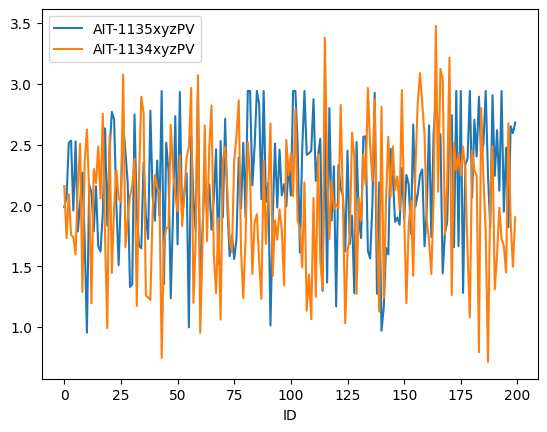

In [100]:
import matplotlib.pyplot as plt

synthetic_data.plot(kind = 'line', x = 'ID', y = ['AIT-1135xyzPV', 'AIT-1134xyzPV'])

plt.show()

# View generated data set

In [101]:
synthetic_data

,ID,AIT-1135xyzPV,AIT-1134xyzPV,TIC-1114xyz,TIC-1114xyz.1,SI-1313xyz,SI-1213xyz,TI-1141xyz,TI-1121xyz,PI-1115xyz,...,TI-1114xyz,TI-1119xyz,PDI-1117xyz.1,PDI-1121xyz,TI-1115xyz,TI-1116xyz,TI-1126xyz,TI-1117xyz,TIT-1123xyz,PI-1112Axyz
0,0,1.987001,2.159119,25.731778,9.861230,16.601562,12450.026370,11.850108,25.302607,70.449471,...,79.142283,184.436901,-0.227126,0.007357,78.033308,62.251398,45.580860,61.049101,49.273098,225.874281
1,1,2.063843,1.730499,21.194703,16.327334,4743.003776,7493.322638,17.129758,22.114191,43.344458,...,82.426808,184.697627,-0.218130,-0.023792,83.833699,65.069748,46.841319,63.512017,48.041864,194.758894
2,2,2.515711,2.091394,27.583081,11.572441,16.601562,12450.026370,11.751603,27.151982,70.449471,...,79.825001,183.478254,-0.226017,0.067836,79.695123,63.179539,46.216385,61.562786,49.683231,218.011325
3,3,2.532101,1.755729,25.147133,14.371381,2341.853852,10347.769268,12.486414,24.187032,51.043275,...,80.996803,184.739523,-0.221190,-0.023792,82.754860,64.556502,46.143115,63.710556,50.419744,178.347882
4,4,1.958044,1.740051,25.434985,10.802776,647.202534,12062.154591,6.695229,25.627771,68.099192,...,83.272284,183.413164,-0.222385,-0.023792,83.905922,65.166477,46.374809,63.636897,49.064471,167.698193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,2.474690,1.448504,21.520793,16.176557,5094.629294,6973.632264,14.516903,20.784235,43.319298,...,79.858393,183.733454,-0.225427,-0.022361,79.661607,61.630874,43.993776,61.451115,52.330266,189.993323
196,196,1.821180,2.676030,24.603911,12.894635,16.601562,12450.026370,11.666264,24.428815,68.076979,...,82.153982,182.740137,-0.223176,-0.023792,83.466848,65.313633,47.693081,63.946983,52.091359,215.495115
197,197,2.650655,1.870469,26.517894,10.733789,16.601562,12241.311367,4.680531,26.025493,70.449471,...,80.102352,183.146936,-0.226328,-0.002533,80.797073,64.411935,47.165650,62.271120,50.490501,176.097556
198,198,2.594616,1.495475,20.891220,17.767624,5916.981041,6393.047244,17.280381,22.123257,41.729114,...,81.894441,183.624960,-0.219796,-0.023792,83.269542,64.495585,46.204987,63.084384,49.350908,190.432459


# 4. Test and check quality

This object computes an overall quality score on a scale of 0 to 100% (100 being the best) as well as detailed breakdowns. For more insights, you can also visualize the synthetic vs. real data.

In [102]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    datasets,
    synthetic_data,
    metadata)

Creating report: 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]


Overall Quality Score: 87.4%

Properties:
Column Shapes: 77.76%
Column Pair Trends: 97.04%


In [104]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=datasets,
    synthetic_data=synthetic_data,
    column_name='AIT-1134xyzPV',
    metadata=metadata
)
    
fig.show()

# Simulate senarios

https://docs.sdv.dev/sdv/single-table-data/sampling#simulate-scenarios

In the below exmaple we sample with a condition that it is 2ppm from water analyser.

In [105]:
from sdv.sampling import Condition

highWaterContent = Condition(
    num_rows=250,
    column_values={'AIT-1134xyzPV': 2.0}
)

In [106]:
synthetic_data_restricted = synthesizer.sample_from_conditions(
    conditions=[highWaterContent]
    #,
    #output_file_path='synthetic_simulated_scenario5.csv'
)
synthetic_data_restricted

Sampling conditions: 100%|██████████| 250/250 [00:00<00:00, 794.18it/s]


,ID,AIT-1135xyzPV,AIT-1134xyzPV,TIC-1114xyz,TIC-1114xyz.1,SI-1313xyz,SI-1213xyz,TI-1141xyz,TI-1121xyz,PI-1115xyz,...,TI-1114xyz,TI-1119xyz,PDI-1117xyz.1,PDI-1121xyz,TI-1115xyz,TI-1116xyz,TI-1126xyz,TI-1117xyz,TIT-1123xyz,PI-1112Axyz
0,200,2.737478,2.0,12.538538,20.254895,8580.099099,16.601562,29.518917,15.230568,-0.083594,...,82.506213,187.821557,-0.218781,-0.023792,81.310137,60.382075,39.727226,60.282187,46.426323,214.844074
1,201,1.742445,2.0,21.172411,17.075595,3366.229327,7123.120176,15.681634,19.859272,37.083683,...,80.659622,184.497678,-0.225427,0.074706,81.173844,61.963987,42.829332,60.449876,49.570569,199.788396
2,202,2.033161,2.0,20.466806,14.206355,3561.997182,8308.111861,11.513931,20.135579,41.211251,...,80.373998,185.084834,-0.223761,0.014274,79.538808,60.702607,41.860467,60.241538,48.401987,203.351508
3,203,1.743135,2.0,25.554552,16.134414,1522.164910,12450.026370,17.173023,25.710907,70.449471,...,78.069671,182.861403,-0.221601,0.021179,80.086265,62.876848,46.167708,61.849525,51.238564,209.717427
4,204,2.941152,2.0,23.884335,12.303712,199.344526,9564.367581,11.615086,23.485350,51.319545,...,83.946716,184.551736,-0.224076,-0.002623,82.551967,64.242735,46.188358,63.447518,52.336336,199.205932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,445,2.774469,2.0,21.718938,13.896931,1094.569808,7941.814876,14.684379,22.147526,38.786033,...,82.939348,183.778204,-0.223864,-0.004714,81.551983,64.140492,46.007938,62.525552,47.961939,234.389970
246,446,1.577277,2.0,19.866547,18.560730,3421.661718,10323.026823,17.620361,18.182592,47.549198,...,75.912586,184.871983,-0.228236,0.076503,77.274067,60.446090,43.322298,58.953567,50.203837,209.334599
247,447,2.569187,2.0,24.238456,14.062207,16.601562,11130.247758,13.682227,24.307635,61.281438,...,80.844944,183.622118,-0.222560,0.036977,81.677490,64.471324,47.353016,62.362224,50.285189,189.211988
248,448,2.900143,2.0,24.568036,12.659020,733.494150,11079.126003,9.289192,24.261504,62.748696,...,81.019053,182.220595,-0.224368,-0.023792,82.799083,64.298449,45.878746,63.571098,48.378964,188.181270


# Use data as input to a NeqSim process simulation model



In [ ]:
# download neqsim model (use xml..)


